In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re # regular expressions 

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\s

In [2]:
# creating empty reviews list 
kindle_reviews =[]
#forest = ["the","king","of","jungle"]

In [4]:
for i in range(1,200):
  ip=[]  
  url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})

In [11]:
# Extracting the content under specific tags  
   
for i in range(len(reviews)):
    ip.append(reviews[i].text)  
kindle_reviews=kindle_reviews+ip  # adding the reviews of one page to empty list which in future contains all the reviews
help(WordCloud)  

Help on class WordCloud in module wordcloud.wordcloud:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defaul

In [12]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(kindle_reviews)


In [13]:
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)

In [14]:
# words that contained  reviews
ip_reviews_words = ip_rev_string.split(" ")

In [15]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6E82-34BE

 Directory of C:\Users\KUMAR SANU\Assignment\Text Mining

05-04-2021  14:06    <DIR>          .
05-04-2021  14:06    <DIR>          ..
05-04-2021  13:50    <DIR>          .ipynb_checkpoints
04-04-2021  12:28               211 Assignment.txt
04-04-2021  22:42           170,849 Elon_musk.csv
05-04-2021  13:22         1,721,558 Elon_Musk.ipynb
05-04-2021  13:49             3,981 extracting reviews and sentimental analysis.py
04-04-2021  12:28            46,299 negative-words.txt
04-04-2021  12:28            20,630 positive-words.txt
04-04-2021  12:28             4,158 stop.txt
05-04-2021  14:06            22,744 Untitled.ipynb
               8 File(s)      1,990,430 bytes
               3 Dir(s)  189,580,132,352 bytes free


In [16]:
#stop_words = stopwords.words('english')

with open('stop.txt') as sw:
    stopwords = sw.read()

In [17]:
stopwords = stopwords.split("\n")

In [18]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stopwords]

In [19]:
ip_rev_string = " ".join(ip_reviews_words)

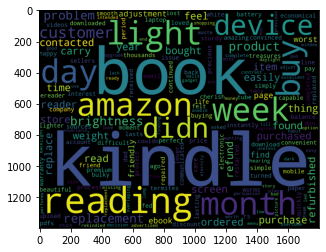

In [20]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)

In [21]:
# positive words # Choose the path for +ve words stored in system
with open('positive-words.txt') as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]


In [22]:
# negative words  Choose path for -ve words stored in system
with open('negative-words.txt') as neg:
  negwords = neg.read().split("\n")

In [23]:
negwords = negwords[37:]

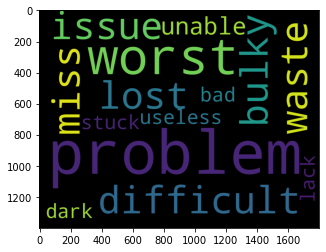

In [24]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)

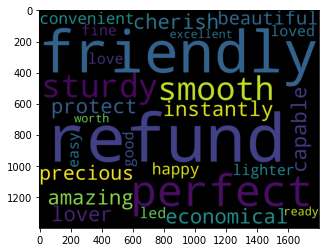

In [25]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)

plt.imshow(wordcloud_pos_in_pos)